In [2]:
!pip install ndjson

In [3]:
import ndjson

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Video_Games_5.json to Video_Games_5.json


In [5]:
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

# convert to and from objects
text = ndjson.dumps(data)
data = ndjson.loads(text)

In [6]:
# dump to file-like objects
with open('backup.ndjson', 'w') as f:
    ndjson.dump(data, f)

In [7]:
import altair as alt
import pandas as pd

In [8]:
df = pd.DataFrame(data)

In [44]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [45]:
ratings5 = df[df['overall'] == 5.0]['overall'].count()
ratings5

299759

In [46]:
ratings4 = df[df['overall'] == 4.0]['overall'].count()
ratings4

93654

In [47]:
ratings3 = df[df['overall'] == 3.0]['overall'].count()
ratings3

49146

In [48]:
ratings2 = df[df['overall'] == 2.0]['overall'].count()
ratings2

24135

In [49]:
ratings1 = df[df['overall'] == 1.0]['overall'].count()
ratings1

30883

In [50]:
df.shape

(497577, 12)

In [51]:
ratings1 + ratings2 + ratings3 + ratings4 + ratings5 == 497577

True

In [54]:
df_count = df.groupby(['overall']).size()  # .to_frame("size")
df_count

overall
1.0     30883
2.0     24135
3.0     49146
4.0     93654
5.0    299759
dtype: int64

In [24]:
!pip install altair_viewer

     |████████████████████████████████| 844 kB 5.1 MB/s 


In [30]:
!pip install altair vega_datasets

In [67]:
df_count_after_transform = pd.DataFrame(df_count)
df_count_after_transform

,0
overall,
1.0,30883
2.0,24135
3.0,49146
4.0,93654
5.0,299759


In [79]:
import altair as alt
import pandas as pd
import numpy as np

chart = alt.Chart(df).mark_bar().encode(
    alt.X('overall'),
    y='count()'
)
chart

MaxRowsError: ignored

alt.Chart(...)

In [80]:
!pip install altair_transform

In [81]:
from altair_transform import transform_chart
new_chart = transform_chart(chart)
new_chart

alt.Chart(...)

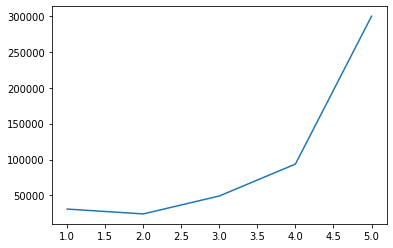

In [63]:
matplotlib.pyplot.plot(df_count)

In [83]:
from imblearn.under_sampling import RandomUnderSampler 

In [88]:
rus = RandomUnderSampler(sampling_strategy = {1.0: 1500, 2.0: 1500, 3.0: 500, 4.0: 500, 5.0: 1500}, random_state = 42)

In [91]:
y = df['overall']
y

0         5.0
1         4.0
2         3.0
3         2.0
4         5.0
         ... 
497572    4.0
497573    3.0
497574    3.0
497575    4.0
497576    2.0
Name: overall, Length: 497577, dtype: float64

In [93]:
X = df.loc[:, df.columns != 'overall']
X

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
497572,True,"07 1, 2017",AVECM71LSZLC5,B01HGPUTCA,boris teplitskiy,not OEM but good replacement parts,Four Stars,1498867200,NaN,NaN,NaN
497573,True,"08 20, 2018",A1RS06313BL6WN,B01HH6JEOC,Tom Stopsign,Okay stuff.,Three Stars,1534723200,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O...",NaN
497574,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,1502064000,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O...",NaN
497575,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",1533427200,NaN,"{'Edition:': ' Collection', 'Platform:': ' Xbo...",NaN


In [94]:
X_res, y_res = rus.fit_resample(X, y)

In [95]:
X_res

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,False,"10 22, 2008",A74TA8X5YQ7NE,B000X9FV5M,NeuroSplicer,Recently UBISOFT had to settle a huge class-ac...,THE DAY GAMING CRIED...,1224633600,NaN,{'Format:': ' Video Game'},NaN
1,True,"03 17, 2018",A2EYD6E0TFQPVL,B014G03F24,chris,"code didn't work, got me a refund.",One Star,1521244800,NaN,NaN,NaN
2,True,"02 22, 2017",A303LKXI2SAZQ4,B003OAE79S,tammy,"these do not work at all, all i get is static ...","these do not work at all, all i get ...",1487721600,NaN,{'Size:': ' one size'},NaN
3,False,"03 23, 2012",A1JGSUX59ZTWYE,B004UDLRMS,Bear,well let me start by saying that when i first ...,last gen game,1332460800,6,{'Format:': ' Video Game'},NaN
4,False,"05 16, 2008",AXIVHIP86D1MJ,B0013B30SY,Mustang,"Dont waste your money, you will just end up us...",Waste,1210896000,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5495,True,"10 16, 2016",A3JY1C17IZZFD0,B00DBDPOZ4,Spootypuff,"Nice long micro USB cable, battery lasts a lon...",Five Stars,1476576000,NaN,{'Format:': ' Video Game'},NaN
5496,True,"10 13, 2016",A1XECVJAW1EWYM,B01GD490UM,crybaby2,I've been having a great time with this game. ...,Five Stars,1476316800,NaN,NaN,NaN
5497,True,"11 10, 2015",A2QWNT8N1PXBI9,B00FWWY1V0,steve605,d,Five Stars,1447113600,NaN,NaN,NaN
5498,True,"08 30, 2016",A2CDMJQ7I44ZBL,B0050SYXSW,Jaclyn,"Really pretty, funny, interesting game. Works ...",Awesome!,1472515200,NaN,NaN,NaN


In [108]:
y_res

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5495    5.0
5496    5.0
5497    5.0
5498    5.0
5499    5.0
Name: overall, Length: 5500, dtype: float64

In [119]:
# sanity check

y_res.groupby(y_res).describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,1500.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2.0,1500.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3.0,500.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4.0,500.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5.0,1500.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


In [121]:
from numpy.random import randint

In [127]:
from pandas.core.common import random_state
rand_idxs = randint(low = 0, high = 497576, size = 100000)

In [128]:
_100ksample_df = df.iloc[rand_idxs]

In [133]:
_100ksample_df_new_titles = pd.DataFrame({'ratings': _100ksample_df['overall'], 'reviews': _100ksample_df['reviewText']})
_100ksample_df_new_titles

,ratings,reviews
366626,5.0,Love this game! So sad that they can't call it...
150315,4.0,grandson played it a few times. Seemed to lik...
51294,5.0,What I liked the most is the freedom of moves....
235082,4.0,"First of all, i'm an avid fan of both franchis..."
298683,5.0,Amazing graphics and gameplay. I love the mech...
...,...,...
25722,5.0,I play this all the time!! Thank you so much !!
83896,1.0,I ordered the wrong game for wii I don't have ...
418450,5.0,Absolutely worth the money. Great product. Sol...
132443,5.0,I used this on the PSP 1000 and it worked perf...


In [134]:
_100ksample_df_new_titles.to_csv('big_corpus.csv')

In [135]:
_5500sample_df_new_titles = pd.DataFrame({'ratings': y_res, 'reviews': X_res['reviewText']})
_5500sample_df_new_titles

,ratings,reviews
0,1.0,Recently UBISOFT had to settle a huge class-ac...
1,1.0,"code didn't work, got me a refund."
2,1.0,"these do not work at all, all i get is static ..."
3,1.0,well let me start by saying that when i first ...
4,1.0,"Dont waste your money, you will just end up us..."
...,...,...
5495,5.0,"Nice long micro USB cable, battery lasts a lon..."
5496,5.0,I've been having a great time with this game. ...
5497,5.0,d
5498,5.0,"Really pretty, funny, interesting game. Works ..."


In [137]:
_5500sample_df_new_titles.to_csv('small_corpus.csv')

In [139]:
from google.colab import files
files.download("small_corpus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
files.download("big_corpus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
while True:pass